In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
train = pd.read_csv("Loan.csv")

In [3]:
train.head()

,No,Age,Education,Industry,Experience,Marital Status,Own House,Dependents,Income,Loan Affordability
0,31,38,No schooling,Arts & Media,20,DIVORCED,NO,3,66385.60627,NO
1,50,44,No schooling,Construction,26,SINGLE,NO,2,71385.60627,NO
2,61,33,No schooling,Steel,15,MARRIED,NO,0,84385.60627,NO
3,106,28,No schooling,Arts & Media,10,DIVORCED,NO,2,80385.60627,NO
4,125,41,No schooling,Construction,23,SINGLE,YES,2,66385.60627,NO


In [5]:
train.shape

(38400, 10)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38400 entries, 0 to 38399
Data columns (total 10 columns):
No                    38400 non-null int64
Age                   38400 non-null int64
Education             38400 non-null object
Industry              38400 non-null object
Experience            38400 non-null int64
Marital Status        38400 non-null object
Own House             38400 non-null object
Dependents            38400 non-null int64
Income                38400 non-null float64
Loan Affordability    38400 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 2.9+ MB


In [7]:
train.isnull().sum()

No                    0
Age                   0
Education             0
Industry              0
Experience            0
Marital Status        0
Own House             0
Dependents            0
Income                0
Loan Affordability    0
dtype: int64

In [8]:
for k in train.columns:
    print(k,train[k].nunique())
    
train.head()

No 38400
Age 31
Education 5
Industry 21
Experience  35
Marital Status 3
Own House 2
Dependents 4
Income 417
Loan Affordability 2


,No,Age,Education,Industry,Experience,Marital Status,Own House,Dependents,Income,Loan Affordability
0,31,38,No schooling,Arts & Media,20,DIVORCED,NO,3,66385.60627,NO
1,50,44,No schooling,Construction,26,SINGLE,NO,2,71385.60627,NO
2,61,33,No schooling,Steel,15,MARRIED,NO,0,84385.60627,NO
3,106,28,No schooling,Arts & Media,10,DIVORCED,NO,2,80385.60627,NO
4,125,41,No schooling,Construction,23,SINGLE,YES,2,66385.60627,NO


In [9]:
train_df=pd.get_dummies(train,columns=['Education','Industry','Marital Status','Own House'],drop_first=True)

In [12]:
train_df.head()

,No,Age,Experience,Dependents,Income,Loan Affordability,Education_Doctorate,Education_High School,Education_Master,Education_No schooling,...,Industry_Manufacturing,Industry_Petroleum,Industry_Pharmaceutical,Industry_Pulp and paper,Industry_Software,Industry_Steel,Industry_Transport,Marital Status_MARRIED,Marital Status_SINGLE,Own House_YES
0,31,38,20,3,66385.60627,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50,44,26,2,71385.60627,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,61,33,15,0,84385.60627,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,106,28,10,2,80385.60627,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,125,41,23,2,66385.60627,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [17]:
train_df['Loan Affordability'].replace({"YES":1,"NO":0},inplace=True)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38400 entries, 0 to 38399
Data columns (total 33 columns):
No                              38400 non-null int64
Age                             38400 non-null int64
Experience                      38400 non-null int64
Dependents                      38400 non-null int64
Income                          38400 non-null float64
Loan Affordability              38400 non-null int64
Education_Doctorate             38400 non-null uint8
Education_High School           38400 non-null uint8
Education_Master                38400 non-null uint8
Education_No schooling          38400 non-null uint8
Industry_Arts & Media           38400 non-null uint8
Industry_Chemical               38400 non-null uint8
Industry_Construction           38400 non-null uint8
Industry_Defense                38400 non-null uint8
Industry_Education              38400 non-null uint8
Industry_Energy                 38400 non-null uint8
Industry_Entertainment          38400 non

In [19]:
train_df['Loan Affordability'].value_counts()

0    23430
1    14970
Name: Loan Affordability, dtype: int64

In [ ]:
##train_df['Loan Affordability']=train_df['Loan Affordability'].astype(int)

In [21]:
train_df['Loan Affordability'].value_counts()/len(train_df)

0    0.610156
1    0.389844
Name: Loan Affordability, dtype: float64

In [22]:
train_df.columns

Index(['No', 'Age', 'Experience ', 'Dependents', 'Income',
       'Loan Affordability', 'Education_Doctorate', 'Education_High School',
       'Education_Master', 'Education_No schooling', 'Industry_Arts & Media',
       'Industry_Chemical ', 'Industry_Construction ', 'Industry_Defense ',
       'Industry_Education ', 'Industry_Energy ', 'Industry_Entertainment ',
       'Industry_Financial services ', 'Industry_Fishing ',
       'Industry_Food & Beverages', 'Industry_Health care ',
       'Industry_Hospitality ', 'Industry_ICT', 'Industry_Manufacturing',
       'Industry_Petroleum ', 'Industry_Pharmaceutical ',
       'Industry_Pulp and paper ', 'Industry_Software ', 'Industry_Steel ',
       'Industry_Transport ', 'Marital Status_MARRIED',
       'Marital Status_SINGLE', 'Own House_YES'],
      dtype='object')

In [25]:
##Not implemented 
agg_func = {
    'Income': ['sum', 'mean'],
    'Age': ['min','max','count','mean','sum'],
    'Experience ': ['min','max','count','mean','sum'],
    'Dependents': ['min','max','count','mean','sum']
}

In [26]:
train_df1 = train_df.groupby('No').agg(agg_func)

In [27]:
train_df1.columns = ['J_' + '_'.join(col).strip() for col in train_df1.columns.values]
train_df1.reset_index(inplace=True)
train_df1.head()

,No,J_Income_sum,J_Income_mean,J_Age_min,J_Age_max,J_Age_count,J_Age_mean,J_Age_sum,J_Experience _min,J_Experience _max,J_Experience _count,J_Experience _mean,J_Experience _sum,J_Dependents_min,J_Dependents_max,J_Dependents_count,J_Dependents_mean,J_Dependents_sum
0,1,75771.21255,75771.21255,51,51,1,51,51,31,31,1,31,31,1,1,1,1,1
1,2,86771.21255,86771.21255,31,31,1,31,31,9,9,1,9,9,1,1,1,1,1
2,3,67515.44993,67515.44993,41,41,1,41,41,21,21,1,21,21,0,0,1,0,0
3,4,83890.75625,83890.75625,39,39,1,39,39,20,20,1,20,20,0,0,1,0,0
4,5,84000.00000,84000.00000,30,30,1,30,30,9,9,1,9,9,1,1,1,1,1


In [28]:
train_df.head()

,No,Age,Experience,Dependents,Income,Loan Affordability,Education_Doctorate,Education_High School,Education_Master,Education_No schooling,...,Industry_Manufacturing,Industry_Petroleum,Industry_Pharmaceutical,Industry_Pulp and paper,Industry_Software,Industry_Steel,Industry_Transport,Marital Status_MARRIED,Marital Status_SINGLE,Own House_YES
0,31,38,20,3,66385.60627,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50,44,26,2,71385.60627,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,61,33,15,0,84385.60627,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,106,28,10,2,80385.60627,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,125,41,23,2,66385.60627,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
traindf = scaler.fit_transform(train_df.drop(columns = ['No'],axis=0))
traindf = pd.DataFrame(traindf, columns=['Age', 'Experience ', 'Dependents', 'Income',
       'Loan Affordability', 'Education_Doctorate', 'Education_High School',
       'Education_Master', 'Education_No schooling', 'Industry_Arts & Media',
       'Industry_Chemical ', 'Industry_Construction ', 'Industry_Defense ',
       'Industry_Education ', 'Industry_Energy ', 'Industry_Entertainment ',
       'Industry_Financial services ', 'Industry_Fishing ',
       'Industry_Food & Beverages', 'Industry_Health care ',
       'Industry_Hospitality ', 'Industry_ICT', 'Industry_Manufacturing',
       'Industry_Petroleum ', 'Industry_Pharmaceutical ',
       'Industry_Pulp and paper ', 'Industry_Software ', 'Industry_Steel ',
       'Industry_Transport ', 'Marital Status_MARRIED',
       'Marital Status_SINGLE', 'Own House_YES'])

In [36]:
X=traindf.drop(columns=['Loan Affordability'],axis=0)
y=traindf['Loan Affordability']

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold
#from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [37]:
def simple_model(alg):

    # splitting data into training and validation set
    xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=42, test_size=0.2)
    model = alg
    model.fit(xtrain, ytrain) # training the model
#     prediction = model.predict_proba(xtest) # predicting on the validation set
#     prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#     prediction_int = prediction_int.astype(np.int)

    print("f1_score:",f1_score(ytest, model.predict(xtest))) # calculating f1 score
    #print("AUC:",(ytest, model.predict(xtest))) # calculating f1 score
    print("Accuracy on train data:",model.score(xtrain,ytrain))
    print("Accuracy on test data:",model.score(xtest,ytest))

In [38]:
algs = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
algs_lst = ['LR','DTC','RFC','ETC','ABC','GBC']
for alg,l in zip(algs,algs_lst):
    print(l)
    simple_model(alg=alg)

LR
f1_score: 0.0
Accuracy on train data: 0.6103515625
Accuracy on test data: 0.609375
DTC
f1_score: 0.39551746868820037
Accuracy on train data: 0.9953776041666667
Accuracy on test data: 0.5223958333333333
RFC
f1_score: 0.297960024726973
Accuracy on train data: 0.96845703125
Accuracy on test data: 0.5563802083333333
ETC
f1_score: 0.331399845320959
Accuracy on train data: 0.9953776041666667
Accuracy on test data: 0.5497395833333333
ABC
f1_score: 0.0006664445184938354
Accuracy on train data: 0.6103515625
Accuracy on test data: 0.6095052083333333
GBC
f1_score: 0.0118148999015425
Accuracy on train data: 0.6127278645833333
Accuracy on test data: 0.6079427083333333


In [46]:
# Confusion Matrix (on AdaBoostClassifier)
from sklearn.metrics import confusion_matrix
xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=42, test_size=0.2)
model = AdaBoostClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
confusion_matrix = confusion_matrix(ytest,ypred)
print(confusion_matrix)

[[4680    0]
 [2999    1]]


In [48]:
from sklearn.metrics import confusion_matrix
xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=42, test_size=0.2)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
confusion_matrix = confusion_matrix(ytest,ypred)
print(confusion_matrix)

[[2837 1843]
 [1807 1193]]


In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

             precision    recall  f1-score   support

        0.0       0.61      0.61      0.61      4680
        1.0       0.39      0.40      0.40      3000

avg / total       0.53      0.52      0.53      7680



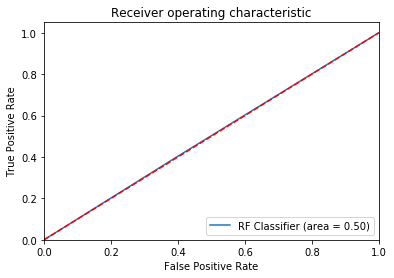

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(ytest, ypred)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.figure()
plt.plot(fpr, tpr, label='RF Classifier (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [72]:
err=[]
y_pred_tot=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMClassifier(n_estimators=3000,random_state=1994,learning_rate=0.03,colsample_bytree=0.2,objective='binary',scale_pos_weight=1)
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
    preds=m.predict_proba(X_test)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(X_test)[:,-1]
    i=i+1
    y_pred_tot.append(p)

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's binary_logloss: 0.668041	valid_0's auc: 0.519821
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.668596	valid_0's auc: 0.525446
err:  0.5254463971334331
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's binary_logloss: 0.666807	valid_0's auc: 0.53763
[400]	valid_0's binary_logloss: 0.666517	valid_0's auc: 0.539463
[600]	valid_0's binary_logloss: 0.666532	valid_0's auc: 0.540139
Early stopping, best iteration is:
[443]	valid_0's binary_logloss: 0.666484	valid_0's auc: 0.539888
err:  0.5398877139682694
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's binary_logloss: 0.669038	valid_0's auc: 0.511683
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.668467	valid_0's auc: 0.514873
err:  0.5148733945341244
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's binary_logloss: 0.667961	valid_0's a

In [73]:
np.mean(err,0)

0.5280802749331356

In [75]:
confusion_matrix = confusion_matrix(y_test,preds)

TypeError: 'numpy.ndarray' object is not callable

In [41]:
X = traindf.drop(labels=['Loan Affordability'], axis=1)
y = traindf['Loan Affordability'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [42]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((28800, 31), (28800,), (9600, 31), (9600,))

In [43]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.07, n_estimators=1000, 
                      min_child_weight=0.01, colsample_bytree=0.5, random_state=0)

lgbm.fit(X_train, y_train,
         eval_set=[(X_cv, y_cv)],
         eval_metric='auc',
         early_stopping_rounds=100,
         verbose=100)

y_pred = lgbm.predict_proba(X_cv)[:,-1]

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.67219	valid_0's auc: 0.518028
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.670609	valid_0's auc: 0.525098


In [44]:
roc_auc_score(y_cv, y_pred)

0.5250981092958038

In [59]:
train1.head()

,No,Age,Education,Industry,Experience,Marital Status,Own House,Dependents,Income,Loan Affordability
0,31,38,No schooling,Arts & Media,20,DIVORCED,NO,3,66385.60627,NO
1,50,44,No schooling,Construction,26,SINGLE,NO,2,71385.60627,NO
2,61,33,No schooling,Steel,15,MARRIED,NO,0,84385.60627,NO
3,106,28,No schooling,Arts & Media,10,DIVORCED,NO,2,80385.60627,NO
4,125,41,No schooling,Construction,23,SINGLE,YES,2,66385.60627,NO


In [63]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38400 entries, 0 to 38399
Data columns (total 10 columns):
No                    38400 non-null int64
Age                   38400 non-null int64
Education             38400 non-null category
Industry              38400 non-null category
Experience            38400 non-null int64
Marital Status        38400 non-null category
Own House             38400 non-null category
Dependents            38400 non-null int64
Income                38400 non-null float64
Loan Affordability    38400 non-null int64
dtypes: category(4), float64(1), int64(5)
memory usage: 1.9 MB


In [58]:
train1=train

In [60]:
train1['Education']=train1['Education'].astype('category')
train1['Industry']=train1['Industry'].astype('category')
train1['Marital Status']=train1['Marital Status'].astype('category')
train1['Own House']=train1['Own House'].astype('category')


In [62]:
train1['Loan Affordability'].replace({"YES":1,"NO":0},inplace=True)

In [64]:
#Not implemented due to unique column constrain
cat_agg=['count','nunique']
num_agg=['min','mean','max','sum']
agg_col={
    'Education':cat_agg, 'Industry':cat_agg, 'Marital Status':cat_agg,'Own House':cat_agg ,'Age':num_agg,'Experience':num_agg,'Dependents':num_agg,
       
}

agg_col

{'Education': ['count', 'nunique'],
 'Industry': ['count', 'nunique'],
 'Marital Status': ['count', 'nunique'],
 'Own House': ['count', 'nunique'],
 'Age': ['min', 'mean', 'max', 'sum'],
 'Experience': ['min', 'mean', 'max', 'sum'],
 'Dependents': ['min', 'mean', 'max', 'sum']}

In [ ]:
#train1=train1.groupby('user_id').agg(agg_col)

In [66]:
X,y=train1.drop(['No','Loan Affordability'],axis=1),train1['Loan Affordability']
Xtest=train1.drop(['No','Loan Affordability'],axis=1)

print(X.shape,Xtest.shape)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994,stratify=y)

(38400, 8) (38400, 8)


In [67]:
train1['Loan Affordability'].value_counts()/train1.shape[0]

0    0.610156
1    0.389844
Name: Loan Affordability, dtype: float64

In [68]:
print(X.shape,Xtest.shape)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994,stratify=y)
categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices

(38400, 8) (38400, 8)


array([1, 2, 4, 5], dtype=int64)

In [69]:
m=CatBoostClassifier(n_estimators=2500,random_state=1994,learning_rate=0.03,eval_metric='AUC')
m.fit(X_train,y_train,eval_set=[(X_val, y_val.values)], early_stopping_rounds=200,verbose=200,cat_features=categorical_features_indices)
p=m.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p))

NameError: name 'CatBoostClassifier' is not defined

In [71]:
from catboost import CatBoostClassifier,Pool, cv

ModuleNotFoundError: No module named 'catboost'

In [ ]:
#install catboost algort
pip install catboost